In [183]:
# Import necessary libraries for data manipulation, analysis, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
# Load the dataset from a CSV file into a pandas DataFrame
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [185]:
# Display initial information about the DataFrame, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [186]:
# Display the first few rows of the DataFrame to get a glimpse of the data
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [187]:
# --------------------- DATA CLEANING ---------------------

# Handling missing values in 'Sleep Disorder' column by filling NaN values with 'None'
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

# Check for duplicate rows in the DataFrame
print("Duplicate Rows:")
df[df.duplicated()]

Duplicate Rows:


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder


In [188]:
# --------------------- DATA REDUCTION ---------------------

# Drop the 'Person ID' column as it is not useful for analysis
df = df.drop(columns=['Person ID'])

In [189]:
# Select columns with numerical data types
numerical_cols = df.select_dtypes(include=[np.number]).columns
numerical_cols

Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Heart Rate', 'Daily Steps'],
      dtype='object')

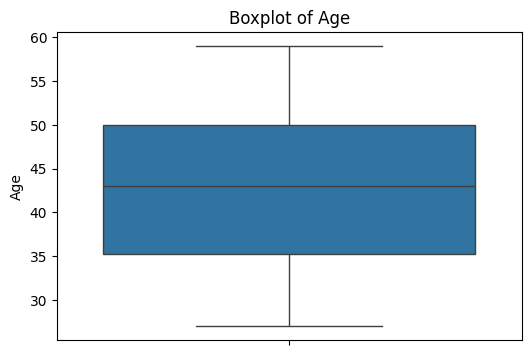

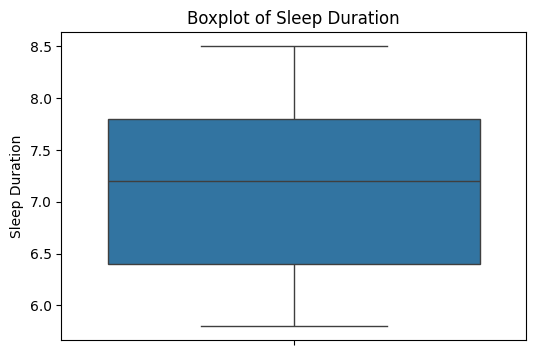

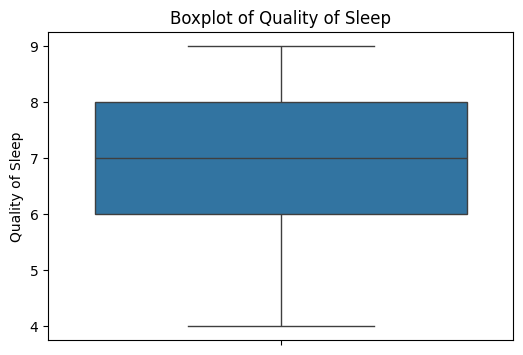

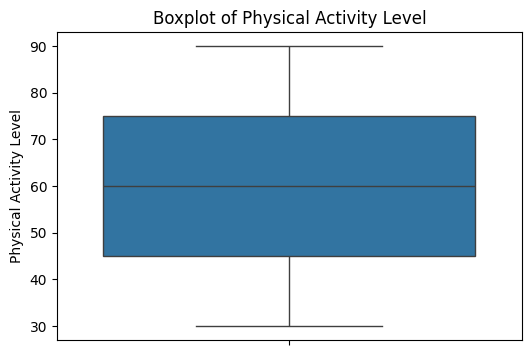

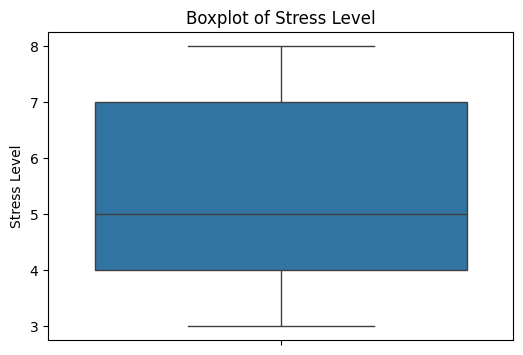

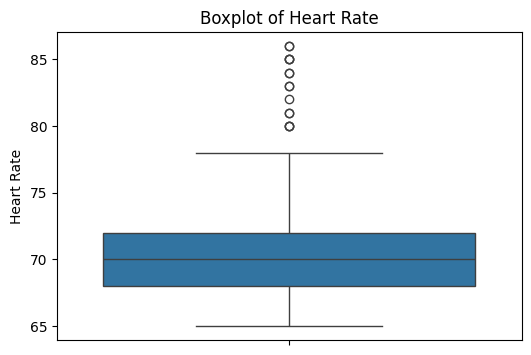

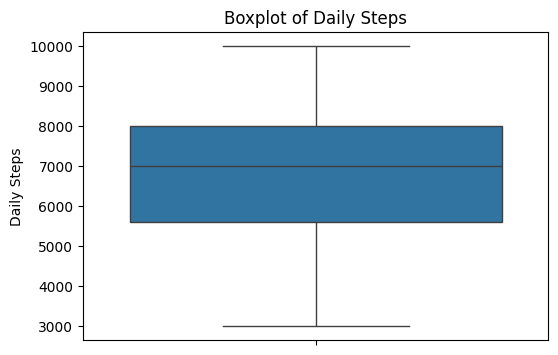

In [190]:
# Iterate through numerical columns and create boxplots to visualize their distribution and identify outliers
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [191]:
# Select columns with non-numerical data types
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
non_numeric_cols

Index(['Gender', 'Occupation', 'BMI Category', 'Blood Pressure',
       'Sleep Disorder'],
      dtype='object')

In [192]:
# Iterate through non-numerical columns and print the unique values in each column
for col in non_numeric_cols:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print('-' * 50)

Unique values in 'Gender':
['Male' 'Female']
--------------------------------------------------
Unique values in 'Occupation':
['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
--------------------------------------------------
Unique values in 'BMI Category':
['Overweight' 'Normal' 'Obese' 'Normal Weight']
--------------------------------------------------
Unique values in 'Blood Pressure':
['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']
--------------------------------------------------
Unique values in 'Sleep Disorder':
['None' 'Sleep Apnea' 'Insomnia']
--------------------------------------------------


In [193]:
# --------------------- DATA INTEGRATION ---------------------

# Clean up 'BMI Category' column by replacing 'Normal Weight' with 'Normal' to standardize categories
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

In [194]:
# --------------------- DATA TRANSFORMATION ---------------------

# Split 'Blood Pressure' column into 'Systolic BP' and 'Diastolic BP' and convert them to integer type
df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

# Drop original 'Blood Pressure' column after splitting
df = df.drop(columns=['Blood Pressure'])
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
370,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
371,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


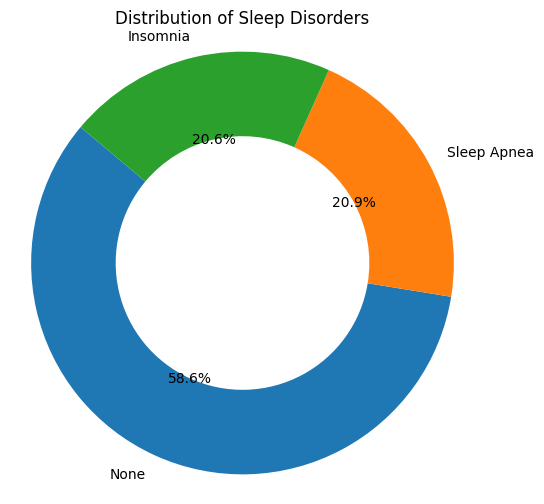

In [195]:
# Count the occurrences of each category in the 'Sleep Disorder' column
sleep_disorder_counts = df['Sleep Disorder'].value_counts()

# Plotting a pie chart to visualize the distribution of sleep disorders
plt.figure(figsize=(6, 6))
plt.pie(sleep_disorder_counts, labels=sleep_disorder_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4))
plt.title('Distribution of Sleep Disorders')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Distribution of Sleep Disorders
The pie chart shows the distribution of sleep disorders in the dataset. The majority of individuals do not have a sleep disorder, while Sleep Apnea and Insomnia are present in a smaller percentage of the population.

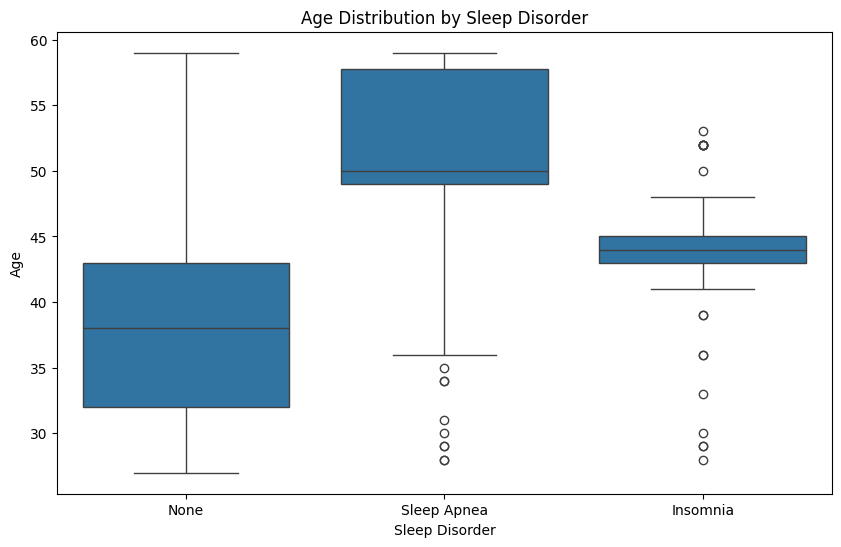

In [196]:
# Create a boxplot to visualize the distribution of 'Age' for each 'Sleep Disorder' category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sleep Disorder', y='Age', data=df)
plt.title('Age Distribution by Sleep Disorder')
plt.ylabel('Age')
plt.xlabel('Sleep Disorder')
plt.show()

### Age Distribution by Sleep Disorder
The boxplot shows that individuals with Sleep Apnea tend to be older than those with Insomnia or no sleep disorder. The age range for Sleep Apnea is also wider, suggesting more variability in age within this group.

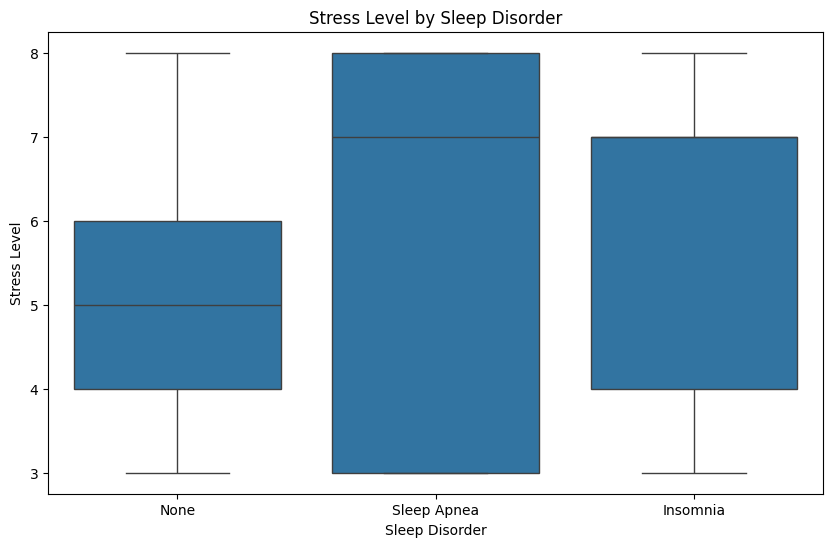

In [197]:
# Create a boxplot to visualize the distribution of 'Stress Level' for each 'Sleep Disorder' category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sleep Disorder', y='Stress Level', data=df)
plt.title('Stress Level by Sleep Disorder')
plt.ylabel('Stress Level')
plt.xlabel('Sleep Disorder')
plt.show()

### Stress Level by Sleep Disorder
The boxplot indicates that individuals with Insomnia and Sleep Apnea generally have higher stress levels compared to those without a sleep disorder. The median stress level is noticeably higher for both Insomnia and Sleep Apnea groups.

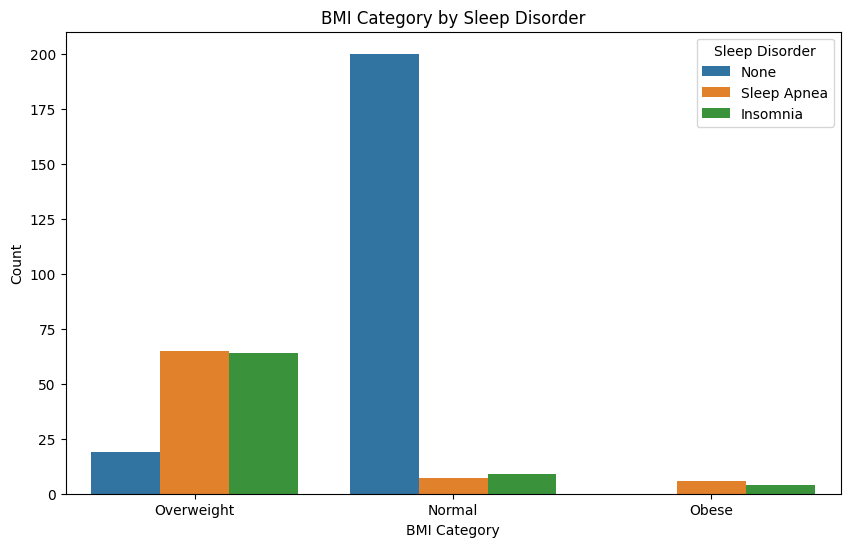

In [198]:
# Create a countplot to visualize the distribution of 'BMI Category' for each 'Sleep Disorder' category
plt.figure(figsize=(10, 6))
sns.countplot(x='BMI Category', hue='Sleep Disorder', data=df)
plt.title('BMI Category by Sleep Disorder')
plt.ylabel('Count')
plt.xlabel('BMI Category')
plt.legend(title='Sleep Disorder')
plt.show()

### BMI Category and Sleep Disorders
The countplot shows that **Obese** individuals have a higher prevalence of **Sleep Apnea** compared to other BMI categories. **Normal** and **Overweight** individuals are more likely to have **Insomnia** or **None** as a sleep disorder.

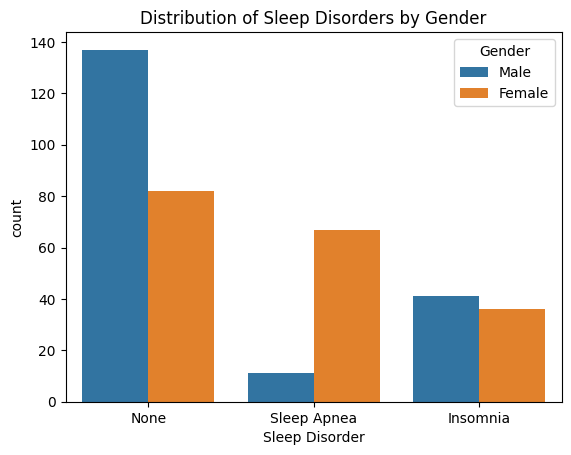

In [199]:
# Create a countplot to visualize the distribution of 'Sleep Disorder' for each 'Gender'
sns.countplot(data=df, x='Sleep Disorder', hue='Gender')
plt.title('Distribution of Sleep Disorders by Gender')
plt.show()

### Sleep Disorders and Gender
The countplot reveals a clear difference in the distribution of sleep disorders between genders. **Males** have a significantly higher count of **Sleep Apnea** compared to females, while **Females** show a slightly higher count of **Insomnia**. Both genders have a substantial number of individuals with **None** as a sleep disorder.

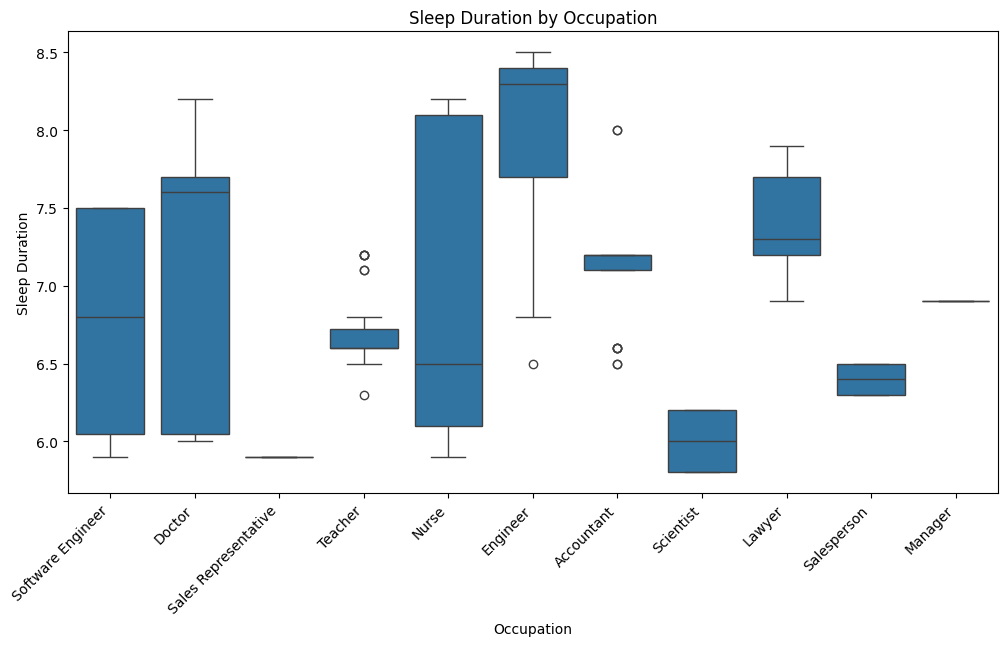

In [200]:
# Create a boxplot to visualize the distribution of 'Sleep Duration' for each 'Occupation'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Occupation', y='Sleep Duration')
plt.xticks(rotation=45, ha='right')
plt.title('Sleep Duration by Occupation')
plt.show()

### Sleep Duration and Occupation
The boxplot illustrates the distribution of sleep duration across different occupations. **Nurses** appear to have a slightly lower median sleep duration and a wider spread compared to other professions, suggesting more variability in their sleep patterns. **Lawyers** and **Accountants** show relatively consistent sleep durations.

In [201]:
# Group the DataFrame by 'Sleep Disorder' and calculate the mean of 'Age', 'Stress Level', and 'Physical Activity Level' for each group
df.groupby('Sleep Disorder')[['Age', 'Stress Level', 'Physical Activity Level']].mean()

,Age,Stress Level,Physical Activity Level
Sleep Disorder,,,
Insomnia,43.519481,5.870130,46.818182
None,39.036530,5.114155,57.949772
Sleep Apnea,49.705128,5.666667,74.794872


### Aggregated Insights by Sleep Disorder
The aggregated analysis reveals interesting trends based on sleep disorder:
- **Age:** Individuals with **Sleep Apnea** have the highest average age, followed by those with **Insomnia**. Individuals with **None** as a sleep disorder have the lowest average age.
- **Stress Level:** Individuals with **Insomnia** and **Sleep Apnea** have higher average stress levels compared to those with no sleep disorder.
- **Physical Activity Level:** Individuals with **Sleep Apnea** have the highest average physical activity level, followed by those with no sleep disorder. Individuals with **Insomnia** have the lowest average physical activity level.

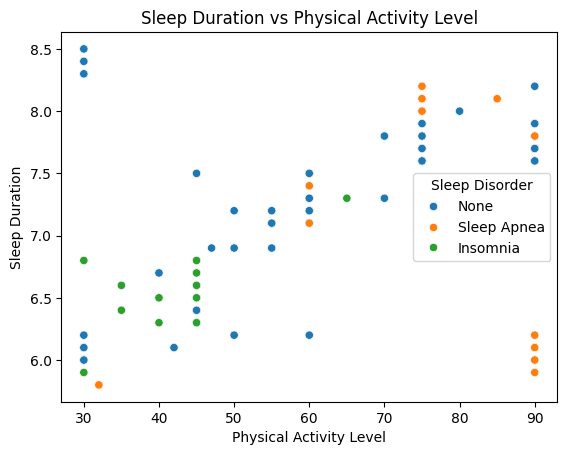

In [202]:
# Create a scatterplot to visualize the relationship between 'Physical Activity Level' and 'Sleep Duration', with points colored by 'Sleep Disorder'
sns.scatterplot(data=df, x='Physical Activity Level', y='Sleep Duration', hue='Sleep Disorder')
plt.title('Sleep Duration vs Physical Activity Level')
plt.show()

### Relationships Between Numerical Features
The scatterplot between **Physical Activity Level** and **Sleep Duration** doesn't show a strong linear correlation, but there seems to be a cluster of individuals with higher physical activity and higher sleep duration who do not have a sleep disorder. The pairwise plot further explores the relationships between numerical features and highlights potential clusters based on sleep disorder.

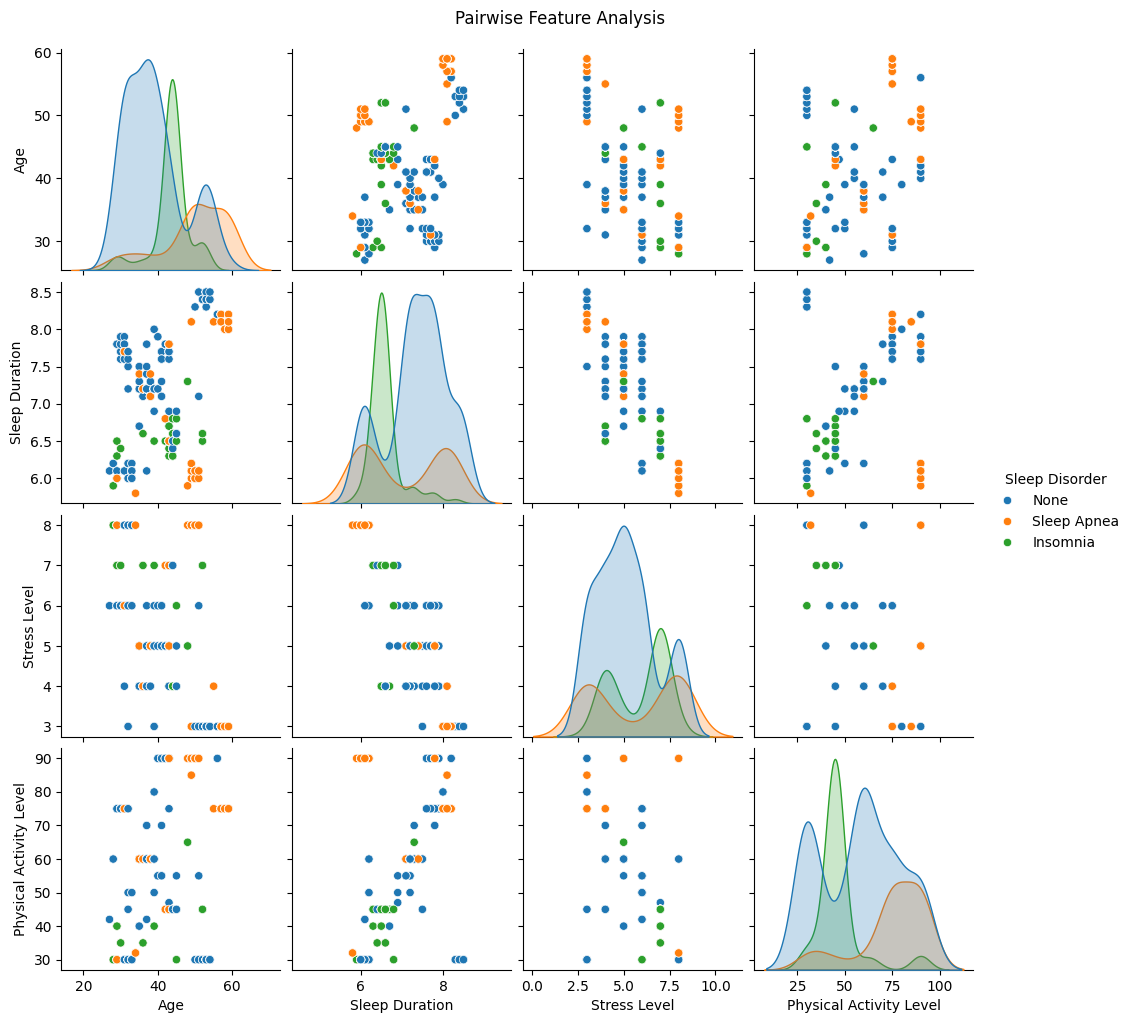

In [203]:
# Create a pairwise plot (scatter matrix) for selected numerical features, colored by 'Sleep Disorder'
sns.pairplot(df, hue='Sleep Disorder', vars=['Age', 'Sleep Duration', 'Stress Level', 'Physical Activity Level'])
plt.suptitle('Pairwise Feature Analysis', y=1.02) # Add a main title to the plot
plt.show()

In [204]:
# Min-Max Normalization for numeric columns to scale features to a range between 0 and 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

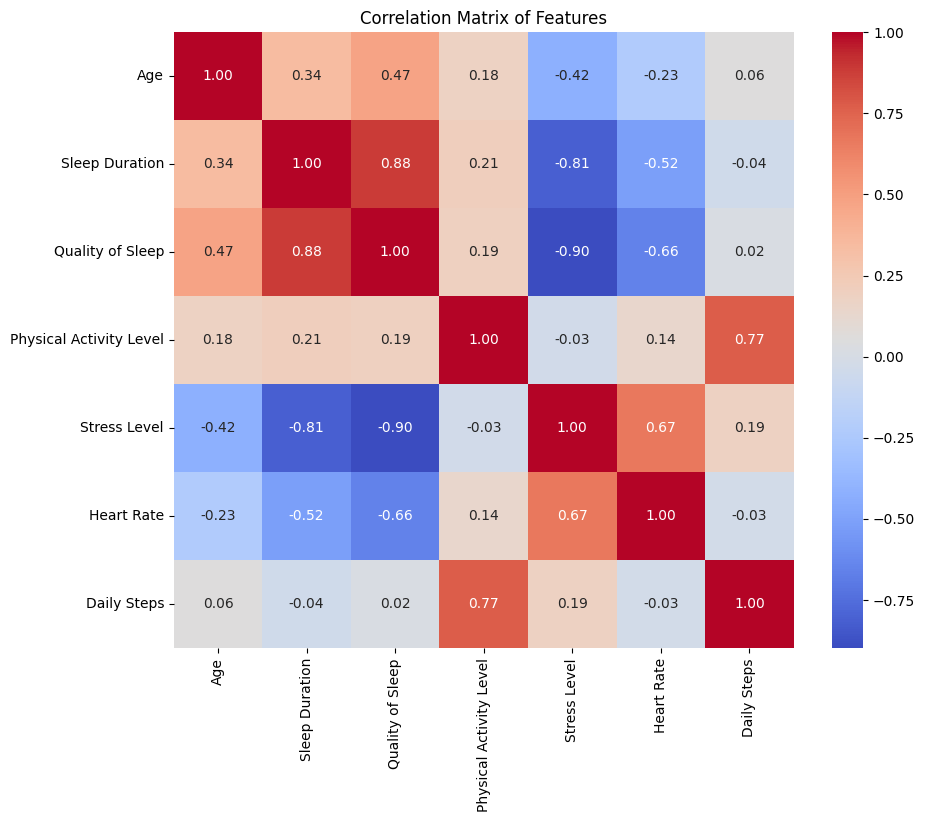

In [205]:
# CORRELATION MATRIX

# Create a heatmap to visualize the correlation matrix of numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

### Correlation Matrix of Features
The heatmap displays the correlation between numerical features. Notable correlations include a positive correlation between Sleep Duration and Quality of Sleep, and a negative correlation between Sleep Duration and Stress Level. Age also shows some correlation with Sleep Duration and Quality of Sleep.